In [1]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

In [2]:
stock_data = pd.read_csv('VZ.csv')
prices = stock_data['Close'].values
log_prices = np.log(prices)
returns = np.diff(log_prices)

In [6]:
observation_matrices = np.vstack([returns, np.ones_like(returns)]).T[:, np.newaxis]

In [7]:
kf = KalmanFilter(transition_matrices=np.eye(2),observation_matrices=observation_matrices,
                  initial_state_mean=[0, 0],
                  initial_state_covariance=np.ones((2, 2)),
                  observation_covariance=1.0,
                  transition_covariance=np.zeros((2, 2)))

In [8]:
state_means, state_covs = kf.filter(returns)

In [9]:
log_predicted_prices = np.hstack([np.array([log_prices[0]]), log_prices[:-1] + state_means[:, 0]])

In [10]:
predicted_prices = np.exp(log_predicted_prices)

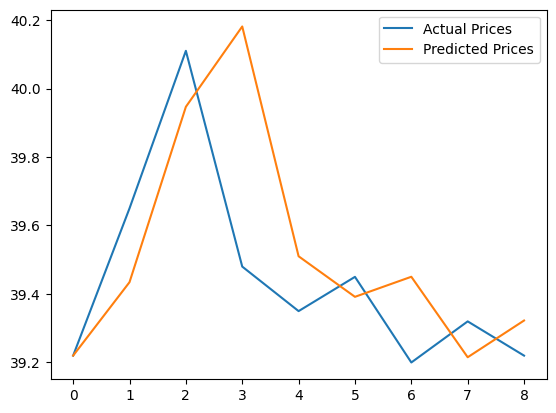

In [11]:
plt.plot(prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()

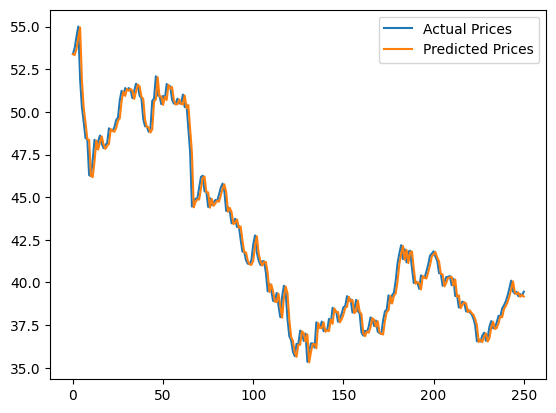

In [28]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# Load your stock data
stock_data = pd.read_csv('VZ_Year.csv')

# Prepare the data
prices = stock_data['Close'].values
log_prices = np.log(prices)
returns = np.diff(log_prices)

# Initialize the Kalman Filter
observation_matrices = np.vstack([returns, np.ones_like(returns)]).T[:, np.newaxis]
kf = KalmanFilter(transition_matrices=np.eye(2),
                  observation_matrices=observation_matrices,
                  initial_state_mean=[0, 0],
                  initial_state_covariance=np.ones((2, 2)),
                  observation_covariance=1.0,
                  transition_covariance=np.zeros((2, 2)))

# Optimize the Kalman Filter parameters using the EM algorithm
kf = kf.em(returns, n_iter=10)

# Run the Kalman Filter to estimate state means and covariances
state_means, state_covs = kf.filter(returns)

# Calculate the predicted stock prices
log_predicted_prices = np.hstack([np.array([log_prices[0]]), log_prices[:-1] + state_means[:, 0]])
predicted_prices = np.exp(log_predicted_prices)

# Visualize the results
plt.plot(prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend()
plt.show()

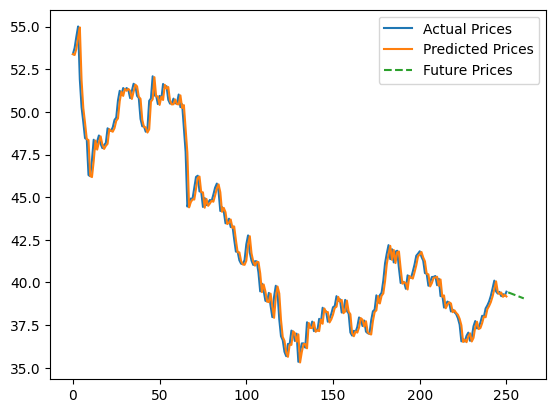

In [29]:
def predict_future_prices(kf, log_prices, state_means, state_covs, x):
    future_log_prices = [log_prices[-1]]
    future_state_mean = state_means[-1]
    future_state_cov = state_covs[-1]

    for _ in range(x):
        future_state_mean = np.dot(kf.transition_matrices, future_state_mean)
        future_state_cov = np.dot(kf.transition_matrices, np.dot(future_state_cov, kf.transition_matrices.T)) + kf.transition_covariance
        future_log_prices.append(future_log_prices[-1] + future_state_mean[0])

    return np.exp(future_log_prices[1:])


x = 10  # Number of future values to predict
future_prices = predict_future_prices(kf, log_prices, state_means, state_covs, x)

# Visualize the results
plt.plot(np.arange(len(prices)), prices, label='Actual Prices')
plt.plot(np.arange(len(predicted_prices)), predicted_prices, label='Predicted Prices')
plt.plot(np.arange(len(prices), len(prices) + len(future_prices)), future_prices, linestyle='--', label='Future Prices')
plt.legend()
plt.show()

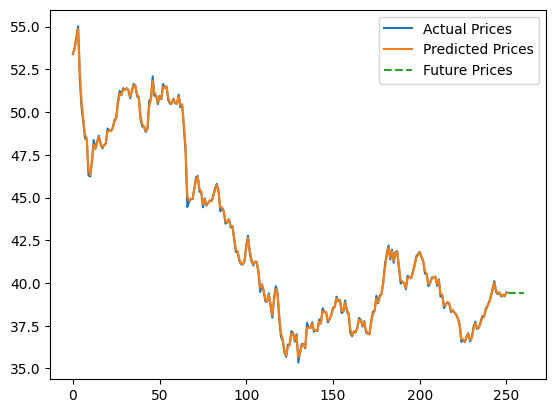

In [32]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# Load your stock data
stock_data = pd.read_csv('VZ_Year.csv')

# Prepare the data
prices = stock_data['Close'].values
log_prices = np.log(prices)

# Initialize the Kalman Filter
kf = KalmanFilter(transition_matrices=np.array([1]),
                  observation_matrices=np.array([1]),
                  initial_state_mean=log_prices[0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.0001)

# Optimize the Kalman Filter parameters using the EM algorithm
kf = kf.em(log_prices, n_iter=10)

# Run the Kalman Filter to estimate state means and covariances
state_means, state_covs = kf.filter(log_prices)

# Calculate the predicted stock prices
predicted_log_prices = state_means.squeeze()
predicted_prices = np.exp(predicted_log_prices)

def predict_future_prices(kf, state_mean, state_cov, x):
    future_log_prices = [state_mean]

    for _ in range(x):
        state_mean = np.dot(kf.transition_matrices, state_mean)
        state_cov = np.dot(kf.transition_matrices, np.dot(state_cov, kf.transition_matrices.T)) + kf.transition_covariance
        future_log_prices.append(state_mean)

    return np.exp(future_log_prices[1:])

x = 10  # Number of future values to predict
future_prices = predict_future_prices(kf, state_means[-1], state_covs[-1], x)

# Visualize the results
plt.plot(np.arange(len(prices)), prices, label='Actual Prices')
plt.plot(np.arange(len(predicted_prices)), predicted_prices, label='Predicted Prices')
plt.plot(np.arange(len(prices), len(prices) + len(future_prices)), future_prices, linestyle='--', label='Future Prices')
plt.legend()
plt.show()

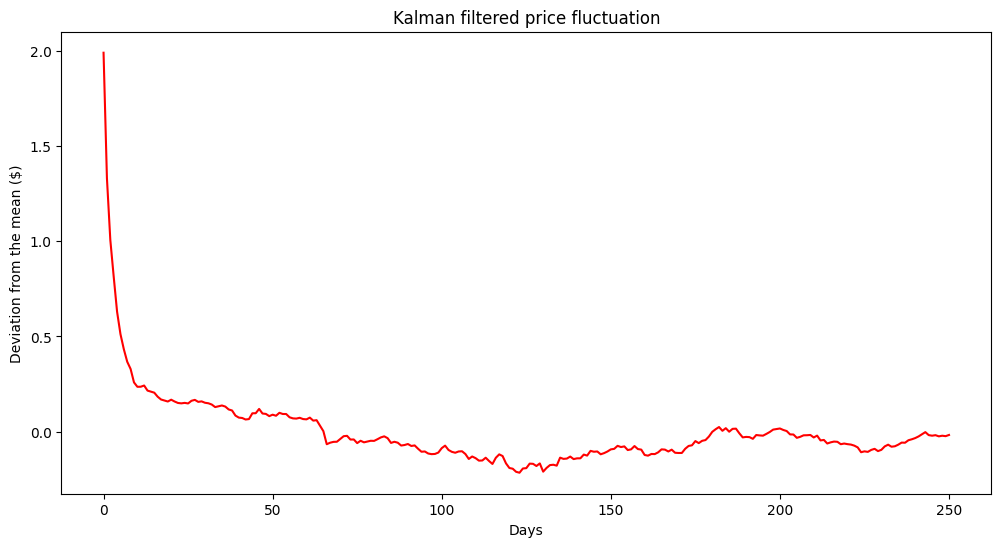

In [33]:
# Load your stock data
stock_data = pd.read_csv('VZ_Year.csv')

# Prepare the data
prices = stock_data['Close'].values
log_prices = np.log(prices)

# Initialize the Kalman Filter
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=0,
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.0001)

# Run the Kalman Filter to estimate state means and covariances
state_means, state_covs = kf.filter(log_prices)

# Calculate the mean and standard deviation
mean, std = state_means.squeeze(), np.std(state_covs.squeeze())

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(log_prices - mean, 'red', lw=1.5)
plt.title("Kalman filtered price fluctuation")
plt.ylabel("Deviation from the mean ($)")
plt.xlabel("Days")
plt.show()

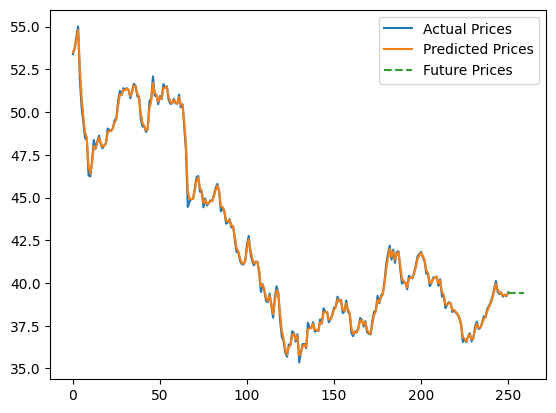

In [37]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# Load your stock data
stock_data = pd.read_csv('VZ_Year.csv')

# Prepare the data
prices = stock_data['Close'].values
log_prices = np.log(prices)

# Initialize the Kalman Filter
kf = KalmanFilter(transition_matrices=np.array([1]),
                  observation_matrices=np.array([1]),
                  initial_state_mean=log_prices[0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.01)

# Optimize the Kalman Filter parameters using the EM algorithm
kf = kf.em(log_prices, n_iter=10)

# Run the Kalman Filter to estimate state means and covariances
state_means, state_covs = kf.filter(log_prices)

# Calculate the predicted stock prices
predicted_log_prices = state_means.squeeze()
predicted_prices = np.exp(predicted_log_prices)

def predict_future_prices(kf, state_mean, state_cov, x):
    future_log_prices = [state_mean]

    for _ in range(x):
        # Prediction step
        state_mean = np.dot(kf.transition_matrices, state_mean)
        state_cov = np.dot(kf.transition_matrices, np.dot(state_cov, kf.transition_matrices.T)) + kf.transition_covariance
        
        # Update step using the predicted log price as a new observation
        innovation = state_mean - kf.observation_matrices * state_mean
        innovation_covariance = kf.observation_matrices * state_cov * kf.observation_matrices.T + kf.observation_covariance
        kalman_gain = state_cov * kf.observation_matrices.T * np.linalg.inv(innovation_covariance)
        state_mean = state_mean + kalman_gain * innovation
        state_cov = (1 - kalman_gain * kf.observation_matrices) * state_cov

        future_log_prices.append(state_mean)

    return np.exp(future_log_prices[1:])

x = 10  # Number of future values to predict
future_prices = predict_future_prices(kf, state_means[-1], state_covs[-1], x)

# Visualize the results
plt.plot(np.arange(len(prices)), prices, label='Actual Prices')
plt.plot(np.arange(len(predicted_prices)), predicted_prices, label='Predicted Prices')
plt.plot(np.arange(len(prices) - 1, len(prices) - 1 + len(future_prices)), future_prices.ravel(), linestyle='--', label='Future Prices')
plt.legend()
plt.show()

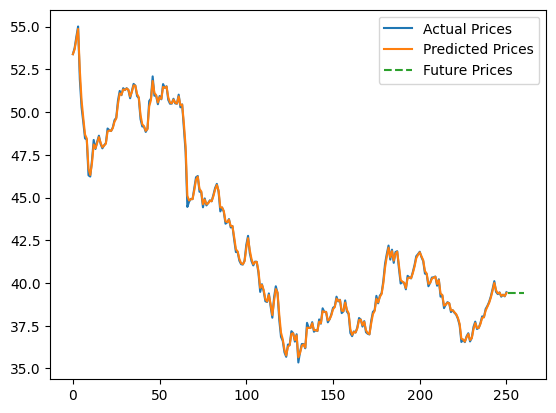

Mean Square Error: 0.0160


In [5]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import matplotlib.pyplot as plt

# Load your stock data
stock_data = pd.read_csv('VZ_Year.csv')

# Prepare the data
prices = stock_data['Close'].values
log_prices = np.log(prices)

# Initialize the Kalman Filter
kf = KalmanFilter(transition_matrices=np.array([1]),
                  observation_matrices=np.array([1]),
                  initial_state_mean=log_prices[0],
                  initial_state_covariance=1,
                  observation_covariance=1,
                  transition_covariance=0.0001)

# Optimize the Kalman Filter parameters using the EM algorithm
kf = kf.em(log_prices, n_iter=10)

# Run the Kalman Filter to estimate state means and covariances using filter_update()
state_means = np.zeros_like(log_prices)
state_covs = np.zeros_like(log_prices)
state_mean = log_prices[0]
state_cov = kf.initial_state_covariance

state_means[0] = state_mean
state_covs[0] = state_cov

for t in range(1, len(log_prices)):
    state_mean, state_cov = kf.filter_update(state_mean, state_cov, log_prices[t])
    state_means[t] = state_mean
    state_covs[t] = state_cov

# Calculate the predicted stock prices
predicted_log_prices = state_means
predicted_prices = np.exp(predicted_log_prices)

# Calculate the mean square error
mse = np.mean((prices - predicted_prices) ** 2)

def predict_future_prices(kf, state_mean, state_cov, x):
    future_log_prices = [state_mean]

    for _ in range(x):
        state_mean = np.dot(kf.transition_matrices, state_mean)
        state_cov = np.dot(kf.transition_matrices, np.dot(state_cov, kf.transition_matrices.T)) + kf.transition_covariance
        future_log_prices.append(state_mean)

    return np.exp(np.array(future_log_prices[1:]).reshape(-1))

x = 10  # Number of future values to predict
future_prices = predict_future_prices(kf, state_means[-1], state_covs[-1], x)

# Visualize the results
plt.plot(np.arange(len(prices)), prices, label='Actual Prices')
plt.plot(np.arange(len(predicted_prices)), predicted_prices, label='Predicted Prices')
plt.plot(np.arange(len(prices), len(prices) + len(future_prices)), future_prices, linestyle='--', label='Future Prices')
plt.legend()
plt.show()

print(f"Mean Square Error: {mse:.4f}")